# Compsci 571 HW4 Question 4.2, 4.3
## SVM training and testing

Yilin Gao (yg95)

Python 3.6

In [20]:
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Import data, normalize features, and separate data into training (0.9) and testing (0.1) sets.

In [2]:
data = np.genfromtxt('creditCard.csv', delimiter=',', skip_header=1)
n = data.shape[0]
X = data[:, :-1]
y = data[:, -1]
# normalize all features
for i in range(X.shape[1]):
    mean = np.mean(X[:, i])
    std = np.std(X[:, i])
    X[:, i] = (X[:, i] - mean) / std
print(X.shape, y.shape)

(1319, 9) (1319,)


Use `sklearn.model_selection.train_test_split` and `numpy` with same random seed will generate different splits. Here I use `sklearn.model_selection.train_test_split`.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2018)

In [62]:
# np.random.seed(2018)
# train_idx = np.random.choice(n, int(n * 0.9), replace = False)
# test_idx = np.array(list(set(range(n)) - set(train_idx)))
# X_train, y_train = X[train_idx, :], y[train_idx]
# X_test, y_test = X[test_idx, :], y[test_idx]

## Linear kernel SVM

In [70]:
linear_svm = svm.LinearSVC()

In [71]:
linear_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [72]:
yhat_test = linear_svm.predict(X_test)
yscore_test = linear_svm.decision_function(X_test)

In [73]:
accu_linear = metrics.accuracy_score(y_test, yhat_test)
auc_linear = metrics.roc_auc_score(y_test, yscore_test)
fpr_linear, tpr_linear, thresholds_linear = metrics.roc_curve(y_test, yscore_test, pos_label=1)
print('Linear SVM:')
print('Accuracy on testing data:', accu_linear)
print('AUC on testing data:', auc_linear)

Linear SVM:
Accuracy on testing data: 0.8636363636363636
AUC on testing data: 0.8316400580551523


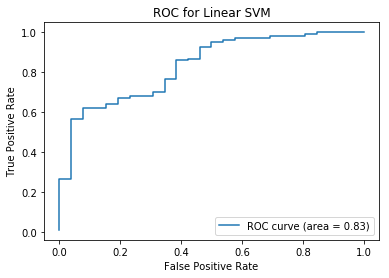

In [74]:
plt.plot(fpr_linear, tpr_linear, label='ROC curve (area = %0.2f)' % auc_linear)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC for Linear SVM')
plt.show()

## Radial base kernel, $\sigma^2 = 25$

In [75]:
rbf25_svm = svm.SVC(kernel='rbf', gamma=1/25)

In [76]:
rbf25_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.04, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
yhat_test_rbf25 = rbf25_svm.predict(X_test)
yscore_test_rbf25 = rbf25_svm.decision_function(X_test)

In [78]:
accu_rbf25 = metrics.accuracy_score(y_test, yhat_test_rbf25)
auc_rbf25 = metrics.roc_auc_score(y_test, yscore_test_rbf25)
fpr_rbf25, tpr_rbf25, thresholds_rbf25 = metrics.roc_curve(y_test, yscore_test_rbf25, pos_label=1)
print('Gaussian kernel with sigma^2 = 25 SVM:')
print('Accuracy on testing data:', accu_rbf25)
print('AUC on testing data:', auc_rbf25)

Gaussian kernel with sigma^2 = 25 SVM:
Accuracy on testing data: 0.8484848484848485
AUC on testing data: 0.8388969521044993


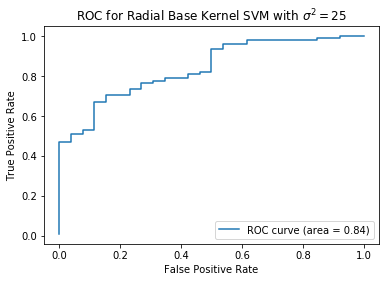

In [79]:
plt.plot(fpr_rbf25, tpr_rbf25, label='ROC curve (area = %0.2f)' % auc_rbf25)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title(r'ROC for Radial Base Kernel SVM with $\sigma^2 = 25$')
plt.show()

## Radial base kernel, $\sigma^2 = 5$

In [80]:
rbf5_svm = svm.SVC(kernel='rbf', gamma=1/5)

In [81]:
rbf5_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
yhat_test_rbf5 = rbf5_svm.predict(X_test)
yscore_test_rbf5 = rbf5_svm.decision_function(X_test)

In [83]:
accu_rbf5 = metrics.accuracy_score(y_test, yhat_test_rbf5)
auc_rbf5 = metrics.roc_auc_score(y_test, yscore_test_rbf5)
fpr_rbf5, tpr_rbf5, thresholds_rbf5 = metrics.roc_curve(y_test, yscore_test_rbf5, pos_label=1)
print('Gaussian kernel with sigma^2 = 5 SVM:')
print('Accuracy on testing data:', accu_rbf5)
print('AUC on testing data:', auc_rbf5)

Gaussian kernel with sigma^2 = 5 SVM:
Accuracy on testing data: 0.7954545454545454
AUC on testing data: 0.7790275761973875


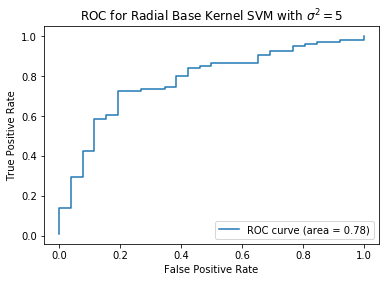

In [84]:
plt.plot(fpr_rbf5, tpr_rbf5, label='ROC curve (area = %0.2f)' % auc_rbf5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title(r'ROC for Radial Base Kernel SVM with $\sigma^2 = 5$')
plt.show()